# DD1318 - Övning 8

Welcome! This is a Colab Notebook. It enables us to run small blocks of python, show graphical output and have some explanatory bits of text inbetween. You can run it here in the browser or locally by using jupyter. Try pressing the play button to the left of the following code snippet!

In [1]:
print("Hello World!")

Hello World!


## Dependencies

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## NumPy

NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

Documentation: https://docs.scipy.org/doc/numpy/

In [4]:
my_list = [2, 8, 4, 16]
my_nparray = np.array(my_list)

print('np.arange(0, 2, 0.2): \t', np.arange(0, 2, 0.2))
print('np.zeros(4): \t\t', np.zeros(4))
print('np.ones(5) *4: \t\t', np.ones(5) * 4)

np.arange(0, 2, 0.2): 	 [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8]
np.zeros(4): 		 [0. 0. 0. 0.]
np.ones(5) *4: 		 [4. 4. 4. 4. 4.]


### Attributes

In [5]:
print('Shape: \t\t', my_nparray.shape)
print('Datatype: \t', my_nparray.dtype)
print('Size: \t\t', my_nparray.size)
print('Num Dimensions: ', my_nparray.ndim)

Shape: 		 (4,)
Datatype: 	 int64
Size: 		 4
Num Dimensions:  1


### Operators

numpy does implement mathematical operators over numerical types as excepted, unlike python

In [6]:
my_list = [2, 8, 4, 16]
my_nparray = np.array(my_list)

print('my_list*2: \t', my_list * 2)
print('my_nparray*2: \t', my_nparray * 2)

my_list*2: 	 [2, 8, 4, 16, 2, 8, 4, 16]
my_nparray*2: 	 [ 4 16  8 32]


### Selection

In [7]:
print('my_nparray[2:4]: \t\t', my_nparray[2:4])
print('my_nparray[my_nparray> 4]: \t', my_nparray[my_nparray > 4])

my_nparray[2:4]: 		 [ 4 16]
my_nparray[my_nparray> 4]: 	 [ 8 16]


### Reshaping

In [10]:
my_nparray = np.zeros(8)
print('my_nparray.reshape(4, 2) \n\n', my_nparray.reshape(4, 2))

my_nparray.reshape(4, 2) 

 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


### Transposing

In [11]:
my_nparray = np.array([[0, 1, 2], [3, 4, 5]])
transposed = my_nparray.transpose()

print('my_nparray.transpose()\n')
print(transposed)
print('\nShape comparison', my_nparray.shape, transposed.shape)

my_nparray.transpose()

[[0 3]
 [1 4]
 [2 5]]

Shape comparison (2, 3) (3, 2)


### Matrix Operations

In [12]:
a = [[1, 2], [3, 4]]
b = [[1, 0], [0, 1]]
mat_a = np.array(a)
mat_b = np.array(b)

print('A * B: \n', np.matmul(mat_a, mat_b))  # proper matrix multiplication
print('\n element-wise: \n',np.multiply(mat_a, mat_b))  # element-wise multiplication

A * B: 
 [[1 2]
 [3 4]]

 element-wise: 
 [[1 0]
 [0 4]]


### There's more (as always)

In [14]:
a = np.arange(4).reshape((2, 2))
print('np.amax(a): \t\t', np.amax(a))
print('np.amax(a, axis=0):\t', np.amax(a, axis=1))

np.amax(a): 		 3
np.amax(a, axis=0):	 [1 3]


## Matplotlib

Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

Official website: https://matplotlib.org/

### Simple Plot

In [15]:
# sample some functions
x = np.arange(18)
y1 = x * x
y2 = 4 * x

print('x :', x)
print('y1:',y1)
print('y2:',y2)

x : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
y1: [  0   1   4   9  16  25  36  49  64  81 100 121 144 169 196 225 256 289]
y2: [ 0  4  8 12 16 20 24 28 32 36 40 44 48 52 56 60 64 68]


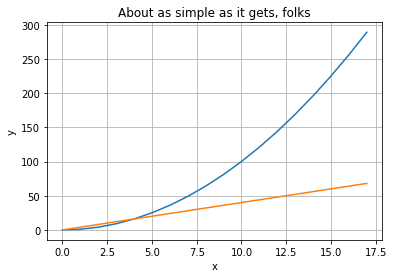

In [16]:
# let's plot!
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)
ax.grid()
ax.set(xlabel='x', ylabel='y', title='About as simple as it gets, folks')

plt.show()

### Trigonometry Plot

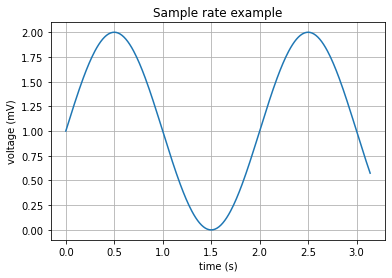

In [19]:
sample_delta = 1 #@param {type:"slider", min:1, max:100, step:1}
sample_delta = sample_delta / 100
x = np.arange(0.0, np.pi, sample_delta)
y = 1 + np.sin(np.pi * x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(xlabel='time (s)', ylabel='voltage (mV)', title='Sample rate example')
ax.grid()

## Performance Check - Convolution



What is a convolution? - simple whiteboard demo


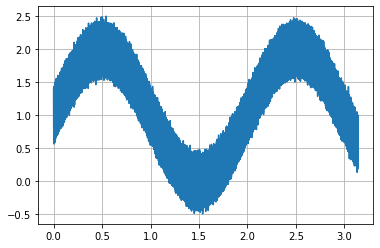

In [39]:
sample_delta = 10000000 #@param {type:"slider", min:1, max:10000000, step:1}
sample_rate = 1 / sample_delta
x = np.arange(0.0, np.pi, sample_rate)
data = 1 + np.sin(np.pi * x)
noise = np.random.normal(0, 0.1, x.size)
noisy_data = data + noise

fig, ax = plt.subplots()
ax.plot(x, noisy_data)
ax.grid()
plt.show()

manual convolution took 69.92759394645691 seconds.


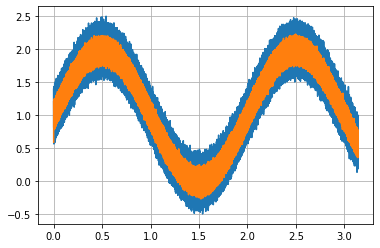

In [41]:
import time

# MANUAL
start_time = time.time()
manual_smooth = np.zeros(x.size)
for i in range(x.size):
  pos0 = noisy_data[i - 2] if i > 1 else 0
  pos1 = noisy_data[i - 1] if i > 0 else 0
  pos2 = noisy_data[i]
  pos3 = noisy_data[i + 1] if i < x.size - 1 else 0
  pos4 = noisy_data[i + 2] if i < x.size - 2 else 0
  
  manual_smooth[i] = 0.06 * pos0 + 0.24 * pos1 + 0.39 * pos2 + 0.24 * pos3 + 0.06 * pos4
print('manual convolution took', time.time() - start_time, 'seconds.')

fig, ax = plt.subplots()
ax.plot(x, noisy_data)
ax.plot(x, manual_smooth)
ax.grid()
plt.show()

np.convolve() took 0.07885479927062988 milliseconds.


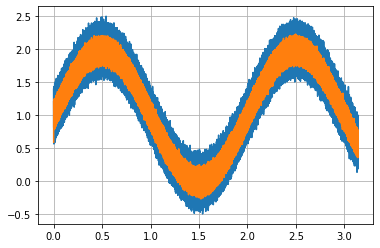

In [40]:
# NUMPY
filt = np.array([0.06, 0.24, 0.39, 0.24, 0.06])
start_time = time.time()
smoothed_data = np.convolve(noisy_data, filt, 'same')
print('np.convolve() took', time.time() - start_time, 'milliseconds.')

fig, ax = plt.subplots()
ax.plot(x, noisy_data)
ax.plot(x, smoothed_data)
ax.grid()
plt.show()